# load data

In [39]:
import os
import numpy as np
import pickle as pkl
%matplotlib inline
import sys
import matplotlib.pyplot as plt

def obtain(dir_path):
    """
    Downloads the dataset to ``dir_path``.
    """

    dir_path = os.path.expanduser(dir_path)
    print('Downloading the dataset')
#     import urllib
    import urllib.request
    urllib.request.urlretrieve('http://www.cs.toronto.edu/~larocheh/public/datasets/binarized_mnist/binarized_mnist_train.amat',os.path.join(dir_path,'binarized_mnist_train.amat'))
    urllib.request.urlretrieve('http://www.cs.toronto.edu/~larocheh/public/datasets/binarized_mnist/binarized_mnist_valid.amat',os.path.join(dir_path,'binarized_mnist_valid.amat'))
    urllib.request.urlretrieve('http://www.cs.toronto.edu/~larocheh/public/datasets/binarized_mnist/binarized_mnist_test.amat',os.path.join(dir_path,'binarized_mnist_test.amat'))

    print('Done')
    


In [13]:
dir_path = '/extra/yadongl10/data/MNIST'
obtain(dir_path)

Done


In [17]:
data = np.loadtxt(dir_path + '/binarized_mnist_train.amat')

In [19]:
data.shape

(50000, 784)

In [23]:
np.savetxt(dir_path+'/binarized_mnist_train_small.txt', data[:5000, :])

In [24]:
data_5000 = np.loadtxt(dir_path + '/binarized_mnist_train_small.txt')

In [45]:

with open('vae_bayes_loss.pkl', 'rb') as f:
    vae_bayes_loss = pkl.load(f)
    
with open('vae_repar_loss.pkl', 'rb') as f:
    vae_repar_loss = pkl.load(f)

In [48]:
len(vae_bayes_loss), len(vae_repar_loss)

(4690, 4690)

In [67]:
idx = np.linspace(0, 4680, 466)
idx

array([    0.        ,    10.06451613,    20.12903226,    30.19354839,
          40.25806452,    50.32258065,    60.38709677,    70.4516129 ,
          80.51612903,    90.58064516,   100.64516129,   110.70967742,
         120.77419355,   130.83870968,   140.90322581,   150.96774194,
         161.03225806,   171.09677419,   181.16129032,   191.22580645,
         201.29032258,   211.35483871,   221.41935484,   231.48387097,
         241.5483871 ,   251.61290323,   261.67741935,   271.74193548,
         281.80645161,   291.87096774,   301.93548387,   312.        ,
         322.06451613,   332.12903226,   342.19354839,   352.25806452,
         362.32258065,   372.38709677,   382.4516129 ,   392.51612903,
         402.58064516,   412.64516129,   422.70967742,   432.77419355,
         442.83870968,   452.90322581,   462.96774194,   473.03225806,
         483.09677419,   493.16129032,   503.22580645,   513.29032258,
         523.35483871,   533.41935484,   543.48387097,   553.5483871 ,
      

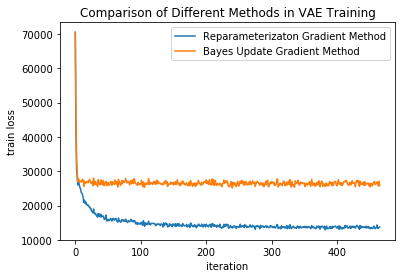

In [71]:
plt.plot([vae_repar_loss[int(i)] for i in idx], label = 'Reparameterizaton Gradient Method')
plt.plot([vae_bayes_loss[int(i)] for i in idx], label = 'Bayes Update Gradient Method')


plt.xlabel('iteration')
plt.ylabel('train loss')
plt.savefig('train_loss')
plt.title('Comparison of Different Methods in VAE Training')
plt.legend()

In [55]:
vae_repar_loss[idx]

TypeError: only integer scalar arrays can be converted to a scalar index